In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import datetime

import plotly.figure_factory as ff

In [2]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('California_official.csv')
data = data.fillna(0) 
display(data)
data1 = data.copy()
data1.drop(data.columns[0:2], axis=1, inplace=True)
display(data1)

,County,Date,Tree Coverage Loss,Avg Temp,Avg Precipitation,Ozone,Nitrogen Dioxide,Floods,Wildfire
0,Alameda,2001,60.0,59.6,22.27,0.087,0.040,0,0
1,Alameda,2002,15.0,59.0,18.34,0.106,0.040,2,0
2,Alameda,2003,62.0,59.7,16.43,0.094,0.035,0,0
3,Alameda,2004,69.0,59.6,18.35,0.080,0.034,0,0
4,Alameda,2005,36.0,59.4,24.52,0.090,0.034,1,0
...,...,...,...,...,...,...,...,...,...
455,Yolo,2016,279.0,63.1,22.92,0.072,0.015,0,0
456,Yolo,2017,58.0,63.1,30.74,0.071,0.014,0,0
457,Yolo,2018,3230.0,62.4,17.84,0.080,0.018,0,0
458,Yolo,2019,400.0,62.4,33.14,0.066,0.013,12,1


,Tree Coverage Loss,Avg Temp,Avg Precipitation,Ozone,Nitrogen Dioxide,Floods,Wildfire
0,60.0,59.6,22.27,0.087,0.040,0,0
1,15.0,59.0,18.34,0.106,0.040,2,0
2,62.0,59.7,16.43,0.094,0.035,0,0
3,69.0,59.6,18.35,0.080,0.034,0,0
4,36.0,59.4,24.52,0.090,0.034,1,0
...,...,...,...,...,...,...,...
455,279.0,63.1,22.92,0.072,0.015,0,0
456,58.0,63.1,30.74,0.071,0.014,0,0
457,3230.0,62.4,17.84,0.080,0.018,0,0
458,400.0,62.4,33.14,0.066,0.013,12,1


In [4]:
 def PCA(x):
    # (1) Compute mean of each row:
    x_bar = X.mean(axis = 1)
    #(1.1) Construct the average matrix
    X_bar = x_bar*np.ones((1, X.shape[1]))
    #(2) Substract mean from data
    B = X - X_bar
    # Method(2): (3)Perform SVD decomposition on matrix B
    U, S, VT = np.linalg.svd(B, full_matrices=False) 
    # Use the singular values from S to construct a diag matrix S
    S = np.diag(S)
    # (4) Construct principle component matrix
    T = np.matmul(U,S)
    # Return principle component matrux T and Sigma from SVD decomposition
    return T,S

In [5]:
X = np.mat(data1)
T, S = PCA(X)

In [6]:
target = data.iloc[:,0:2] 
dl1 = pd.DataFrame(T[:,0])
dl2 = pd.DataFrame(T[:,1])
principal_df = pd.concat([dl1, dl2 , pd.DataFrame(data)] , axis = 1)
display(principal_df)

,0,0,County,Date,Tree Coverage Loss,Avg Temp,Avg Precipitation,Ozone,Nitrogen Dioxide,Floods,Wildfire
0,-43.098350,53.631562,Alameda,2001,60.0,59.6,22.27,0.087,0.040,0,0
1,-1.819886,52.567192,Alameda,2002,15.0,59.0,18.34,0.106,0.040,2,0
2,-45.834760,53.317225,Alameda,2003,62.0,59.7,16.43,0.094,0.035,0,0
3,-52.036928,53.338515,Alameda,2004,69.0,59.6,18.35,0.080,0.034,0,0
4,-20.407532,53.480519,Alameda,2005,36.0,59.4,24.52,0.090,0.034,1,0
...,...,...,...,...,...,...,...,...,...,...,...
455,-245.229125,55.997582,Yolo,2016,279.0,63.1,22.92,0.072,0.015,0,0
456,-39.419255,57.296895,Yolo,2017,58.0,63.1,30.74,0.071,0.014,0,0
457,-2978.191846,44.751336,Yolo,2018,3230.0,62.4,17.84,0.080,0.018,0,0
458,-353.767544,52.885456,Yolo,2019,400.0,62.4,33.14,0.066,0.013,12,1


In [7]:
# Choose feature and target
from sklearn.model_selection import train_test_split
X = data1.iloc[:,0:5].to_numpy()      
Y = data['Floods'].to_numpy()

[ 2.19206301e-05  1.58010466e-01  2.48556571e-01  0.00000000e+00
 -0.00000000e+00]


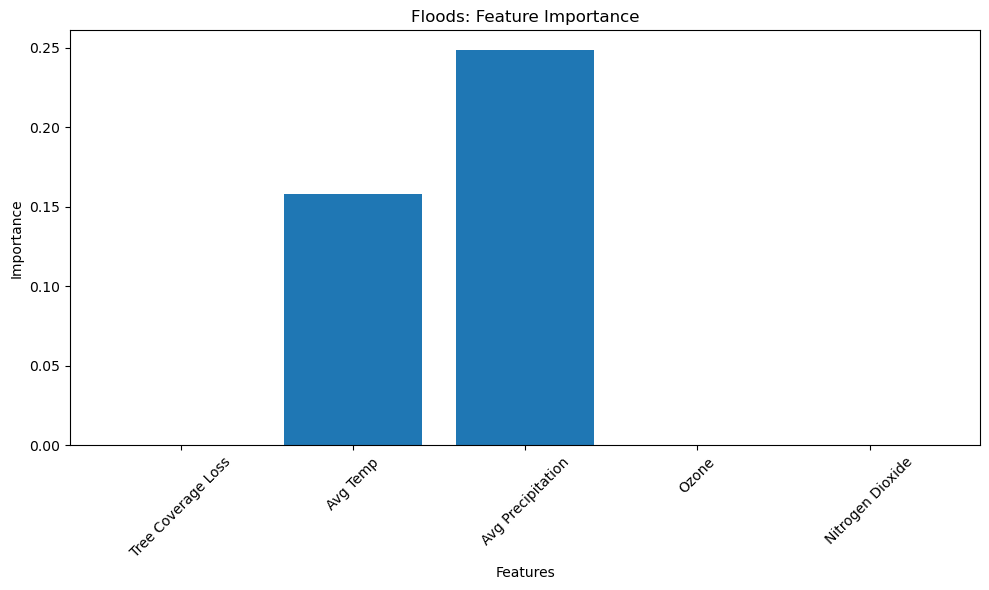

In [8]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.5)
clf.fit(X, Y)
print(clf.coef_)
features = ['Tree Coverage Loss','Avg Temp', 'Avg Precipitation', 'Ozone', 'Nitrogen Dioxide']
importance = abs(clf.coef_)

plt.figure(figsize=(10, 6))
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Floods: Feature Importance')
plt.tight_layout()
plt.show()


In [9]:
# ELASTIC NET for verification of LASSO
clf2 = linear_model.ElasticNet(alpha=0.1)
clf2.fit(X, Y)
print(clf2.coef_)

[ 2.82555395e-05  2.06257513e-01  2.64483845e-01  0.00000000e+00
 -0.00000000e+00]
